In [24]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

fashion_mnist = tf.keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

trainImages = trainImages.reshape(trainImages.shape[0], 28, 28, 1).astype('float32')/255
testImages = testImages.reshape(testImages.shape[0], 28, 28, 1).astype('float32')/255

#one - hot encoding -> categorical crossentropy
trainLabels = tf.keras.utils.to_categorical(trainLabels, 10)
testLabels = tf.keras.utils.to_categorical(testLabels, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#sparse categorical cross entropy는 만약 내가 one hot 인코딩을 안했다면 사용.
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

MODEL_DIR = './model/CNN_Mnist_fashion/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/CNN_Mnist_fashion/{epoch:02d}={val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(trainImages, trainLabels, validation_data=(testImages, testLabels), epochs=30, batch_size=40, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(testImages, testLabels)[1]))


Epoch 1: val_loss improved from inf to 0.31420, saving model to ./model/CNN_Mnist_fashion/01=0.3142.keras

Epoch 2: val_loss improved from 0.31420 to 0.28161, saving model to ./model/CNN_Mnist_fashion/02=0.2816.keras

Epoch 3: val_loss improved from 0.28161 to 0.25327, saving model to ./model/CNN_Mnist_fashion/03=0.2533.keras

Epoch 4: val_loss did not improve from 0.25327

Epoch 5: val_loss improved from 0.25327 to 0.22756, saving model to ./model/CNN_Mnist_fashion/05=0.2276.keras

Epoch 6: val_loss did not improve from 0.22756

Epoch 7: val_loss improved from 0.22756 to 0.22351, saving model to ./model/CNN_Mnist_fashion/07=0.2235.keras

Epoch 8: val_loss did not improve from 0.22351

Epoch 9: val_loss did not improve from 0.22351

Epoch 10: val_loss did not improve from 0.22351

Epoch 11: val_loss did not improve from 0.22351

Epoch 12: val_loss did not improve from 0.22351

Epoch 13: val_loss did not improve from 0.22351

Epoch 14: val_loss did not improve from 0.22351

Epoch 15: v

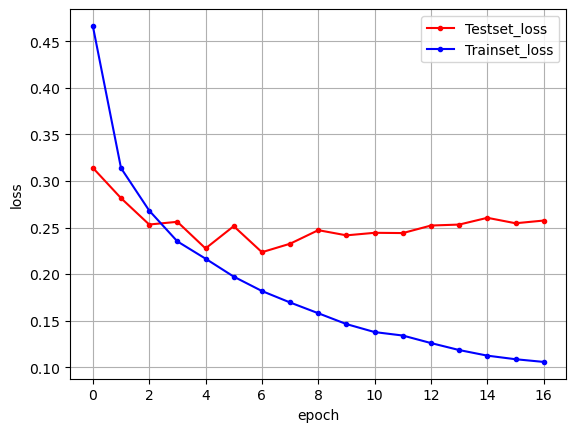

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({}}".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

이미지 개수:  6
이미지 이름:  1 2 3 4 5 6


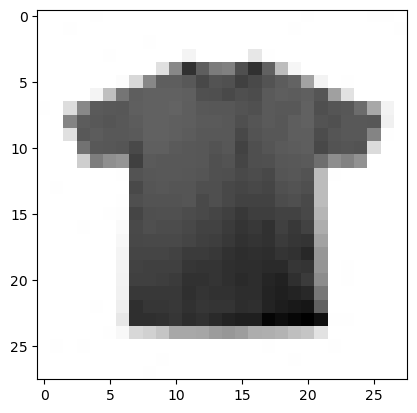

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
T-shirt/top


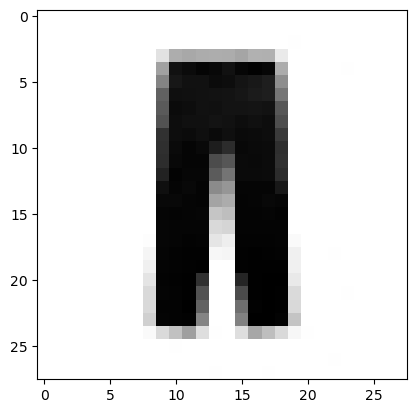

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Trouser


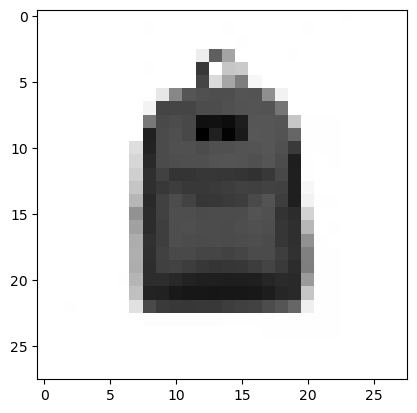

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Bag


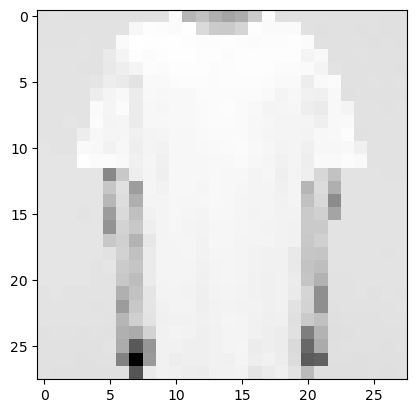

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Pullover


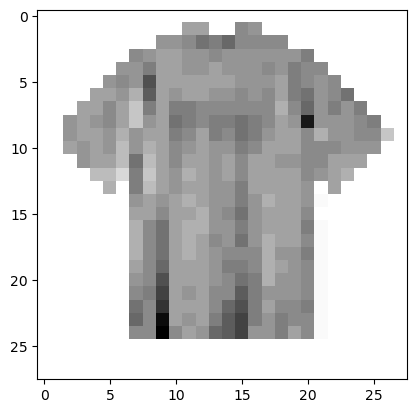

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
T-shirt/top


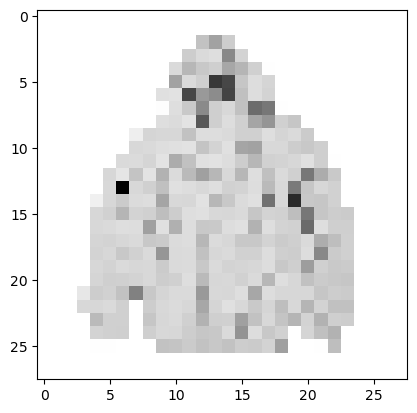

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Coat


In [42]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model('./model/CNN_Mnist_fashion/07=0.2235.keras')
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n = int(input('이미지 개수: '))
jpg_list=input('이미지 이름: ').split()
test_num = [None]*n
test_predict=list()

for i in range(n):
    test_num[i] = cv2.imread('./datas/mnist_fashion/'+jpg_list[i] + '.jpg')
    if test_num[i] is None:
        print(f"Error: Image '{jpg_list[i]}.jpg' not found")
        continue
    test_num[i] = cv2.cvtColor(test_num[i], cv2.COLOR_BGR2GRAY)
    test_num[i] = cv2.resize(test_num[i], (28, 28))
    test_num[i] = 255 - test_num[i]
    plt.imshow(test_num[i], cmap='Greys')
    plt.show()
    test_num[i] = test_num[i]/255
    test_num[i] = np.expand_dims(test_num[i], 0)
    prediction = model.predict(test_num[i])
    print(class_names[prediction.argmax()])